## Show all the column names of our cell feature profile

In [ ]:
import pandas as pd

csv_path = "/data/user/fangxy/CU/drug_cell/output_csv/Cells.csv"
df2 = pd.read_csv(csv_path)
cols = df2.columns
grouped = {}

for col in cols:
    tokens = col.split('_')
    group = "_".join(tokens) if len(tokens) >= 2 else col
    grouped.setdefault(group, []).append(col)

for group, col_list in grouped.items():
    print(f"{group}")
    # for col in col_list:
    #     print("  ", col)


ImageNumber
ObjectNumber
AreaShape_Area
AreaShape_BoundingBoxArea
AreaShape_BoundingBoxMaximum_X
AreaShape_BoundingBoxMaximum_Y
AreaShape_BoundingBoxMinimum_X
AreaShape_BoundingBoxMinimum_Y
AreaShape_Center_X
AreaShape_Center_Y
AreaShape_Compactness
AreaShape_ConvexArea
AreaShape_Eccentricity
AreaShape_EquivalentDiameter
AreaShape_EulerNumber
AreaShape_Extent
AreaShape_FormFactor
AreaShape_MajorAxisLength
AreaShape_MaxFeretDiameter
AreaShape_MaximumRadius
AreaShape_MeanRadius
AreaShape_MedianRadius
AreaShape_MinFeretDiameter
AreaShape_MinorAxisLength
AreaShape_Orientation
AreaShape_Perimeter
AreaShape_Solidity
AreaShape_Zernike_0_0
AreaShape_Zernike_1_1
AreaShape_Zernike_2_0
AreaShape_Zernike_2_2
AreaShape_Zernike_3_1
AreaShape_Zernike_3_3
AreaShape_Zernike_4_0
AreaShape_Zernike_4_2
AreaShape_Zernike_4_4
AreaShape_Zernike_5_1
AreaShape_Zernike_5_3
AreaShape_Zernike_5_5
AreaShape_Zernike_6_0
AreaShape_Zernike_6_2
AreaShape_Zernike_6_4
AreaShape_Zernike_6_6
AreaShape_Zernike_7_1
AreaShap

## Compute F-scores of Metadata_pert_iname and Metadata_gene

## Draw correlation heatmaps

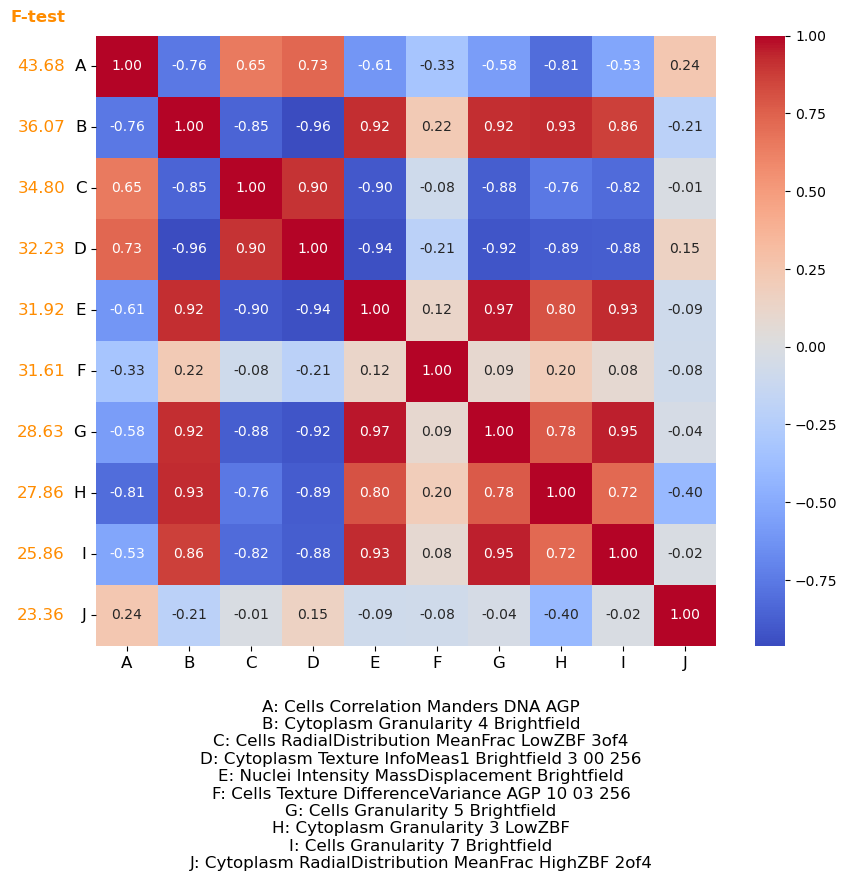

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# 1. Read CSV file and drop unnecessary columns
csv_path = "/data/user/fangxy/CU/2024_Chandrasekaran_NatureMethods-main/profiles/2020_11_04_CPJUMP1/BR00116991/BR00116991_normalized_feature_select_batch.csv"
df = pd.read_csv(csv_path)
df = df.drop(columns=["Metadata_target_sequence", "Metadata_negcon_control_type", "Metadata_pubchem_cid"], errors="ignore")

# 2. Process target variable (using Metadata_pert_iname, filling missing with "control")
target_col = "Metadata_pert_iname"
df[target_col] = df[target_col].fillna("control")
y = df[target_col]

# 3. Select numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols]

# 4. Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. Compute F-test scores
f_values, _ = f_classif(X, y_encoded)
f_series = pd.Series(f_values, index=numeric_cols).sort_values(ascending=False)

# 6. Select top 10 features (by F-test score)
top_10 = f_series.head(10)
top_features = list(top_10.index)

# Create letter mapping for the top features and replace underscores with spaces
letters = list("ABCDEFGHIJ")
feature_letter_mapping = {letters[i]: top_features[i].replace('_', ' ') for i in range(len(top_features))}

# 7. Compute correlation matrix among top 10 features
corr_matrix = X[top_features].corr()

# 8. Create the plot: a single axes for the heatmap with letter tick labels and a legend below
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with annotation
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)

# Replace axis tick labels with letters and set no rotation for x-axis labels
ax.set_xticklabels(letters, fontsize=12, rotation=0)
ax.set_yticklabels(letters, fontsize=12, rotation=0)

# Annotate the F-test scores on the left side of the heatmap
for i, feature in enumerate(top_features):
    f_score = top_10[feature]
    ax.text(-0.5, i + 0.5, f"{f_score:.2f}", va='center', ha='right', color='darkorange', fontsize=12)
ax.text(-0.5, -0.3, "F-test", va='center', ha='right', color='darkorange', fontsize=12, fontweight='bold')

# Build the legend text: each line prints letter and full column name
legend_lines = [f"{letter}: {name}" for letter, name in feature_letter_mapping.items()]
legend_text = "\n".join(legend_lines)

# Adjust layout to leave extra space at the bottom for the legend (increase bottom margin)
plt.subplots_adjust(bottom=0.27)
# Place the legend further below the heatmap
plt.figtext(0.45, 0.05, legend_text, wrap=True, horizontalalignment='center', fontsize=12)

# ax.set_title("Correlation Matrix among Top 10 Features\n(F-test scores annotated on the left)", fontsize=14)
plt.show()

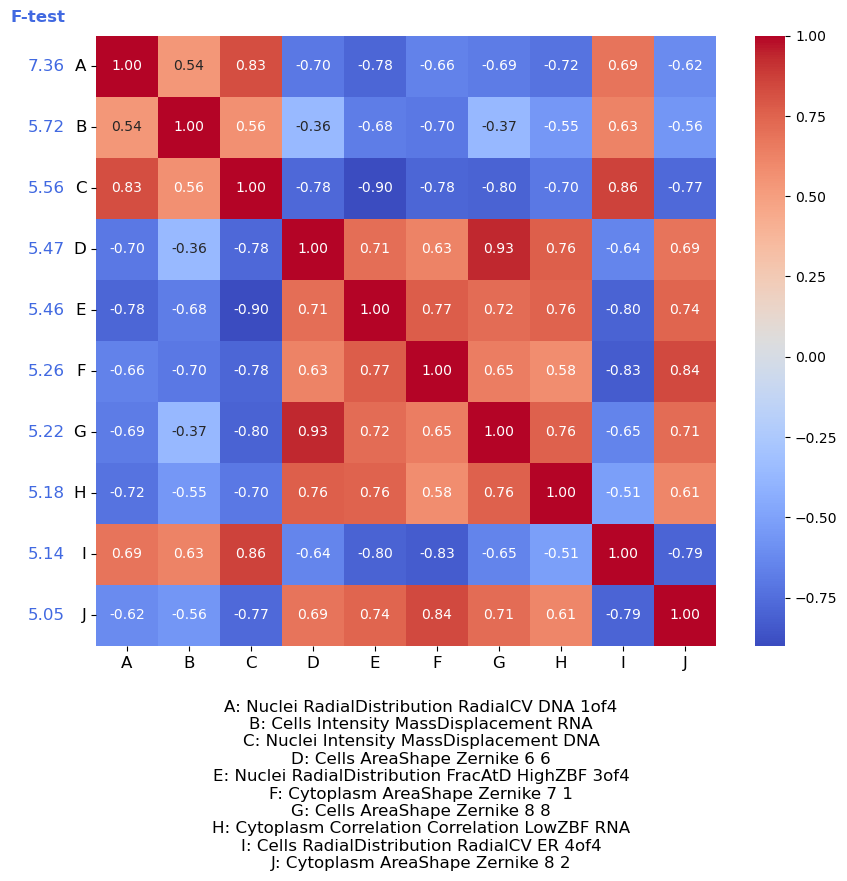

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# 1. Read CSV file and drop unnecessary columns
csv_path = "/data/user/fangxy/CU/2024_Chandrasekaran_NatureMethods-main/profiles/2020_11_04_CPJUMP1/BR00116991/BR00116991_normalized_feature_select_batch.csv"
df = pd.read_csv(csv_path)
df = df.drop(columns=["Metadata_target_sequence", "Metadata_negcon_control_type", "Metadata_pubchem_cid"], errors="ignore")

# 2. Process target variable (using Metadata_pert_iname, filling missing with "control")
target_col = "Metadata_gene"
df[target_col] = df[target_col].fillna("control")
y = df[target_col]

# 3. Select numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols]

# 4. Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. Compute F-test scores
f_values, _ = f_classif(X, y_encoded)
f_series = pd.Series(f_values, index=numeric_cols).sort_values(ascending=False)

# 6. Select top 10 features (by F-test score)
top_10 = f_series.head(10)
top_features = list(top_10.index)

# Create letter mapping for the top features and replace underscores with spaces
letters = list("ABCDEFGHIJ")
feature_letter_mapping = {letters[i]: top_features[i].replace('_', ' ') for i in range(len(top_features))}

# 7. Compute correlation matrix among top 10 features
corr_matrix = X[top_features].corr()

# 8. Create the plot: a single axes for the heatmap with letter tick labels and a legend below
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with annotation
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)

# Replace axis tick labels with letters and set no rotation for x-axis labels
ax.set_xticklabels(letters, fontsize=12, rotation=0)
ax.set_yticklabels(letters, fontsize=12, rotation=0)

# Annotate the F-test scores on the left side of the heatmap
for i, feature in enumerate(top_features):
    f_score = top_10[feature]
    ax.text(-0.5, i + 0.5, f"{f_score:.2f}", va='center', ha='right', color='royalblue', fontsize=12)
ax.text(-0.5, -0.3, "F-test", va='center', ha='right', color='royalblue', fontsize=12, fontweight='bold')

# Build the legend text: each line prints letter and full column name
legend_lines = [f"{letter}: {name}" for letter, name in feature_letter_mapping.items()]
legend_text = "\n".join(legend_lines)

# Adjust layout to leave extra space at the bottom for the legend (increase bottom margin)
plt.subplots_adjust(bottom=0.27)
# Place the legend further below the heatmap
plt.figtext(0.45, 0.05, legend_text, wrap=True, horizontalalignment='center', fontsize=12)

# ax.set_title("Correlation Matrix among Top 10 Features\n(F-test scores annotated on the left)", fontsize=14)
plt.show()


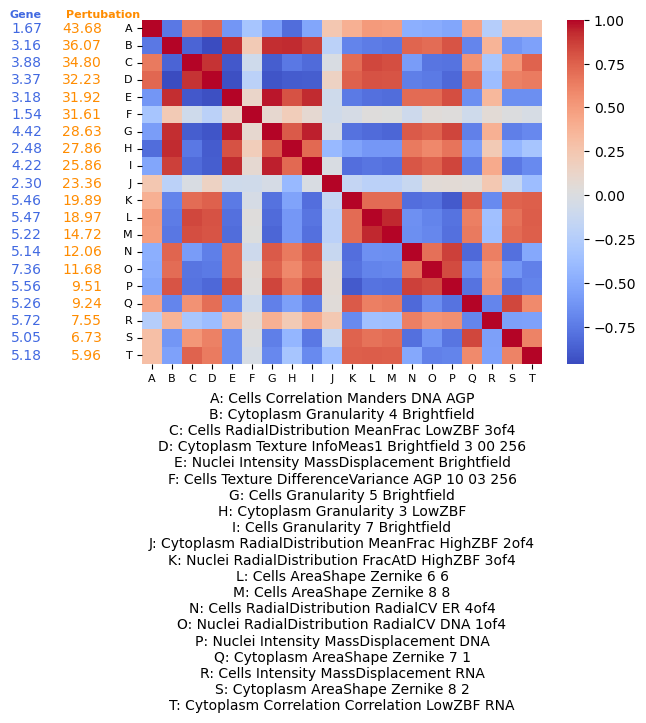

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# 1. Read CSV file and drop unnecessary columns
csv_path = "/data/user/fangxy/CU/2024_Chandrasekaran_NatureMethods-main/profiles/2020_11_04_CPJUMP1/BR00116991/BR00116991_normalized_feature_select_batch.csv"
df = pd.read_csv(csv_path)
df = df.drop(columns=["Metadata_target_sequence", "Metadata_negcon_control_type", "Metadata_pubchem_cid"], errors="ignore")

# 2. Process target variables; fill missing with "control"
target_col_pert = "Metadata_pert_iname"
target_col_gene = "Metadata_gene"
df[target_col_pert] = df[target_col_pert].fillna("control")
df[target_col_gene] = df[target_col_gene].fillna("control")

# 3. Select numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols]

# 4. Compute F-test scores for both targets
# For pert target:
le_pert = LabelEncoder()
y_pert = df[target_col_pert]
y_encoded_pert = le_pert.fit_transform(y_pert)
f_values_pert, _ = f_classif(X, y_encoded_pert)
f_series_pert = pd.Series(f_values_pert, index=numeric_cols).sort_values(ascending=False)

# For gene target:
le_gene = LabelEncoder()
y_gene = df[target_col_gene]
y_encoded_gene = le_gene.fit_transform(y_gene)
f_values_gene, _ = f_classif(X, y_encoded_gene)
f_series_gene = pd.Series(f_values_gene, index=numeric_cols).sort_values(ascending=False)

top10_pert = f_series_pert.head(10)
top10_gene = f_series_gene.head(10)

# 5. Take the union of top 10 features from both targets
union_features = list(set(top10_pert.index) | set(top10_gene.index))
# Sort by pert score if available, otherwise use gene score
def sort_key(feat):
    return -f_series_pert.get(feat, f_series_gene.get(feat, 0))
union_features_sorted = sorted(union_features, key=sort_key)

# 6. Compute correlation matrix among the union features
corr_matrix_union = X[union_features_sorted].corr()

# 7. Create letter mapping for union features and remove underscores from names
num_features = len(union_features_sorted)
letters = [chr(i) for i in range(65, 65 + num_features)]  # A, B, C, ...
feature_letter_mapping = {letters[i]: union_features_sorted[i].replace('_', ' ') for i in range(num_features)}

# 8. Plot heatmap without cell annotations
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_union, annot=False, cmap="coolwarm", ax=ax)

# Set x and y tick labels to letters (no rotation)
ax.set_xticklabels(letters, fontsize=8, rotation=0)
ax.set_yticklabels(letters, fontsize=8, rotation=0)

# 9. Annotate two columns of F-test scores along the left side
# We'll display gene score in blue at x = -1.0 and pert score in red at x = -0.5
for i, feature in enumerate(union_features_sorted):
    score_pert = f_series_pert.get(feature, 0)
    score_gene = f_series_gene.get(feature, 0)
    ax.text(-5, i + 0.5, f"{score_gene:.2f}", va='center', ha='right', fontsize=10, color='royalblue')
    ax.text(-2, i + 0.5, f"{score_pert:.2f}", va='center', ha='right', fontsize=10, color='darkorange')
# Add header labels for the two score columns
ax.text(-5, -0.3, "Gene", va='center', ha='right', fontsize=8, fontweight='bold', color='royalblue')
ax.text(-0.1, -0.3, "Pertubation", va='center', ha='right', fontsize=8, fontweight='bold', color='darkorange')

# 10. Adjust layout to leave space on the left and bottom for annotations and legend
plt.subplots_adjust(left=0.4, bottom=0.45)

# 11. Build and place legend text mapping letters to full feature names, placed further below the heatmap
legend_lines = [f"{letter}: {name}" for letter, name in feature_letter_mapping.items()]
legend_text = "\n".join(legend_lines)
plt.figtext(0.6, 0.02, legend_text, wrap=True, horizontalalignment='center', fontsize=10)

# ax.set_title("Correlation Matrix for Union of Top 10 Features\nF-test scores (Gene in blue, Pert in red) are annotated on the left", fontsize=14)
plt.show()


## Average the features of different sites to wells and merge the average data with our metadata

In [ ]:
import pandas as pd

# Path to the CSV file
csv_file = '/data/user/fangxy/CU/drug_cell/output_csv/Cells.csv'

# List of feature columns to extract
features = [
    "ImageNumber",
    "ObjectNumber",
    "Texture_DifferenceVariance_OrigRNA_10_03_256",
    'AreaShape_Area',               # Represents the overall cell area, which is fundamental for assessing cell size.
    'AreaShape_Compactness',        # Indicates how regular or round a cell is. It can capture changes in cell shape induced by perturbations.
    'AreaShape_Eccentricity',       # Reflects the elongation of the cell. Cells undergoing morphological changes (e.g., due to drug treatment) may exhibit altered eccentricity.
    'AreaShape_Perimeter',          # Complements area by describing the complexity of the cell boundary.
    'Intensity_MeanIntensity_OrigRNA',      # Provides the average pixel intensity within the cell. Changes in mean intensity can signal altered cellular states.
    'Intensity_IntegratedIntensity_OrigRNA',# Reflects the total intensity over the cell area, capturing overall brightness changes that might correlate with metabolic or expression shifts.
    'Granularity_5_OrigRNA',                # Measures texture at a specific scale. This can indicate subcellular heterogeneity or texture changes in response to treatments.
    'RadialDistribution_FracAtD_OrigRNA_4of4'   # Provides a summary measure of how intensity is distributed radially from the cell center, which can be sensitive to intracellular organization changes.
]

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Extract the selected features
extracted_data = df[features]

# Group by ImageNumber and compute the mean for all other columns.
# ObjectNumber is dropped because its average is not meaningful.
averaged_data = extracted_data.drop("ObjectNumber", axis=1).groupby("ImageNumber", as_index=False).mean()

# Display the first few rows of the averaged data
print(averaged_data.head())

# Optionally, save the averaged data to a new CSV file
averaged_data.to_csv('averaged_features.csv', index=False)


   ImageNumber  Texture_DifferenceVariance_OrigRNA_10_03_256  AreaShape_Area  \
0            1                                      0.000403     4794.952381   
1            2                                      0.000451     6773.139394   
2            3                                      0.000469     6266.450450   
3            4                                      0.000381     5079.673913   
4            5                                      0.000510     7910.912281   

   AreaShape_Compactness  AreaShape_Eccentricity  AreaShape_Perimeter  \
0               2.188304                0.722812           342.514061   
1               2.099250                0.733669           376.430273   
2               2.371854                0.731830           399.922906   
3               2.306087                0.769140           366.446087   
4               2.218526                0.732913           431.354088   

   Intensity_MeanIntensity_OrigRNA  Intensity_IntegratedIntensity_OrigRNA  \
0  

In [ ]:
# Load the metadata CSV and the averaged features CSV
metadata_df = pd.read_csv('/data/user/fangxy/CU/drug_cell/metadata_BR00116991_filtered.csv')
features_df = pd.read_csv('/data/user/fangxy/CU/2024_Chandrasekaran_NatureMethods-main/averaged_features.csv')
metadata_df['ImageNumber']=metadata_df['ImageNumber']+1

# Merge the two DataFrames on the common column (e.g., "ImageNumber")
merged_df = pd.merge(metadata_df, features_df, on='ImageNumber', how='left')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('/data/user/fangxy/CU/drug_cell/merged_metadata_and_features.csv', index=False)
